In [1]:
import os
import cv2 as cv
import numpy as np
import random
from utils import DataHandler

# Q1

### Construct histogram

In [2]:
img_sel = [15, 15]
vocab_size = 64
datahandler = DataHandler(img_sel, vocab_size)
histogram_tr, label_tr, histogram_te, label_te = datahandler.load_data()

SIFT...
Clustering...
Shape of vocab:  (16, 128)
Contructing histogram for train set...
Shape of histogram_tr:  (150, 16) = (# of data, # of words)
Contructing histogram for test set...
Shape of histogram_te:  (150, 16) = (# of data, # of words)


### visualization

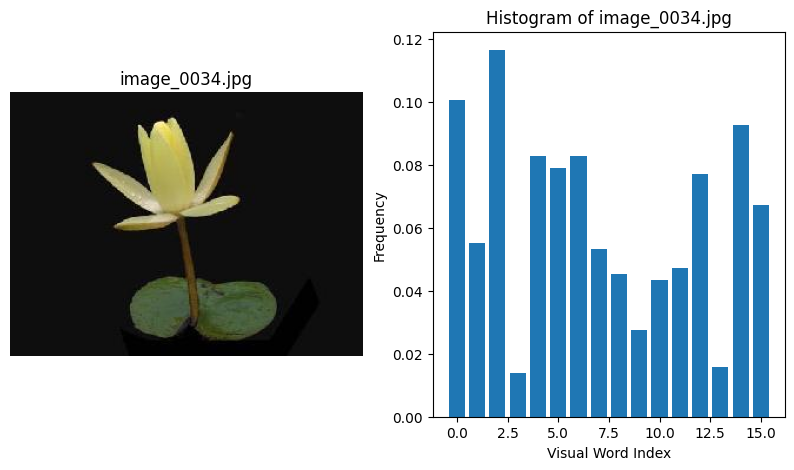

In [3]:
cls = 'water_lilly' # ['water_lilly', 'trilobite', 'wild_cat', 'wrench', 'wheelchair', 'yin_yang', 'umbrella', 'watch', 'windsor_chair', 'tick'
idx = 1 # 0~14
datahandler.visualization(True, cls, idx)

# Q2 RF Classifier

In [4]:
histogram_tr.shape

(150, 16)